# Watched Movies project
## Exploratory analysis

#### In the following code I will get all the watched movies from the database and visualise the information

In [1]:
import sys
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import numpy as np

from helper_funcs import get_list_of_watched_movies, retrieve_ratings_for_movies, id_to_title

""" Connection to database """
try:
    conn = psycopg2.connect(
        host="localhost",
        database="watched_movies_project",
        user="postgres",
        password="12345",
        port="5432"
    )
    print("Connection Established. \n")
except Exception as error:
    print(str(error))
    sys.exit()

cur = conn.cursor()

query = "select * from watched_movies;"
df = sqlio.read_sql_query(query, conn)

df

Connection Established. 



/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


movie_id                                     title  release_year  \
0     tt5052448                                   Get Out          2017   
1     tt0356910                          Mr. & Mrs. Smith          2005   
2     tt1345836                     The Dark Knight Rises          2012   
3     tt0304141  Harry Potter and the Prisoner of Azkaban          2004   
4     tt1950186                            Ford v Ferrari          2019   
...         ...                                       ...           ...   
1046  tt0055630                                   Yojimbo          1961   
1047  tt0089881                                       Ran          1985   
1048  tt1745960                         Top Gun: Maverick          2022   
1049  tt0092099                                   Top Gun          1986   
1050  tt8912936                   DC League of Super-Pets          2022   

               director  duration  \
0          Jordan Peele       104   
1            Doug Liman       120   
2     Christopher Nolan       164   
3        Alfonso Cuarón       142   
4         James Mangold       152   
...                 ...       ...   
1046     Akira Kurosawa       110   
1047     Akira Kurosawa       162   
1048    Joseph Kosinski       130   
1049         Tony Scott       110   
1050        Jared Stern       105   

                                                  cover  \
0     https://m.media-amazon.com/images/M/MV5BMjUxMD...   
1     https://m.media-amazon.com/images/M/MV5BMTUxMz...   
2     https://m.media-amazon.com/images/M/MV5BMTk4OD...   
3     https://m.media-amazon.com/images/M/MV5BMTY4NT...   
4     https://m.media-amazon.com/images/M/MV5BM2UwMD...   
...                                                 ...   
1046  https://m.media-amazon.com/images/M/MV5BZThiZj...   
1047  https://m.media-amazon.com/images/M/MV5BMmU1NG...   
1048  https://m.media-amazon.com/images/M/MV5BOWQwOT...   
1049  https://m.media-amazon.com/images/M/MV5BZjQxYT...   
1050  https://m.media-amazon.com/images/M/MV5BYWI2ND...   

                                             full_cover  
0     https://m.media-amazon.com/images/M/MV5BMjUxMD...  
1     https://m.media-amazon.com/images/M/MV5BMTUxMz...  
2     https://m.media-amazon.com/images/M/MV5BMTk4OD...  
3     https://m.media-amazon.com/images/M/MV5BMTY4NT...  
4     https://m.media-amazon.com/images/M/MV5BM2UwMD...  
...                                                 ...  
1046  https://m.media-amazon.com/images/M/MV5BZThiZj...  
1047  https://m.media-amazon.com/images/M/MV5BMmU1NG...  
1048  https://m.media-amazon.com/images/M/MV5BOWQwOT...  
1049  https://m.media-amazon.com/images/M/MV5BZjQxYT...  
1050  https://m.media-amazon.com/images/M/MV5BYWI2ND...  

[1051 rows x 7 columns]

#### The first plot illustrates the number of view movies from each year

In [2]:
years_series = df['release_year']

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


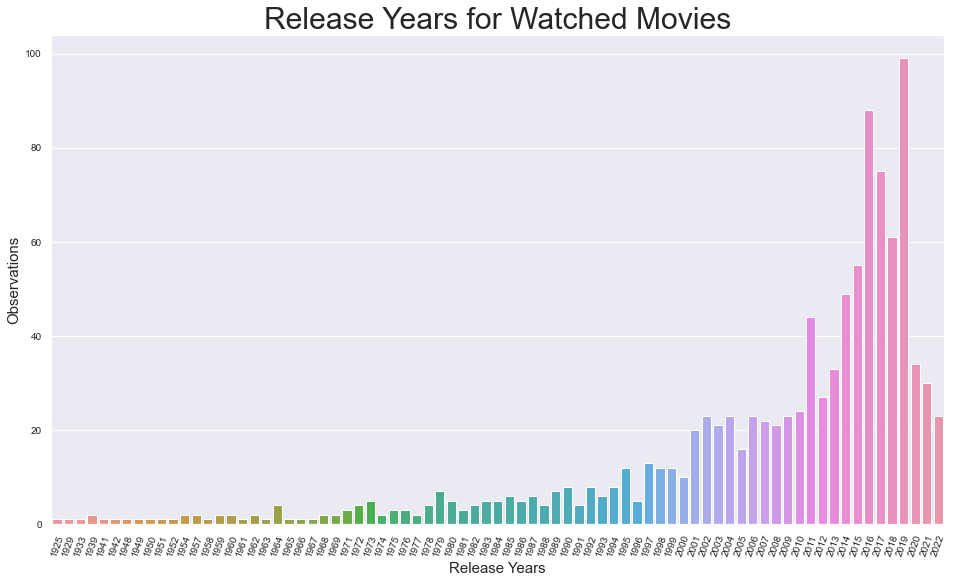

In [3]:
plt.figure(figsize=(16,9))

sns.set()
sns.axes_style("darkgrid")
a = sns.countplot(years_series)
a.axes.set_title("Release Years for Watched Movies", fontsize=30)
a.set_xlabel("Release Years", fontsize=15)
a.set_ylabel("Observations", fontsize=15)
a.set_xticklabels(a.get_xticklabels(), rotation=70)
a.tick_params(labelsize=10)

#### The second plot illustrates the most viewed directors based on the number of watched movies by each

In [4]:
# Count occurencies of directors
directors = df['director'].value_counts()
# Change index name
directors = directors.rename_axis('Directors')
# Keep only occurences greater of 3
directors = directors[directors > 3]
# print(directors.index)
# print(directors.head())

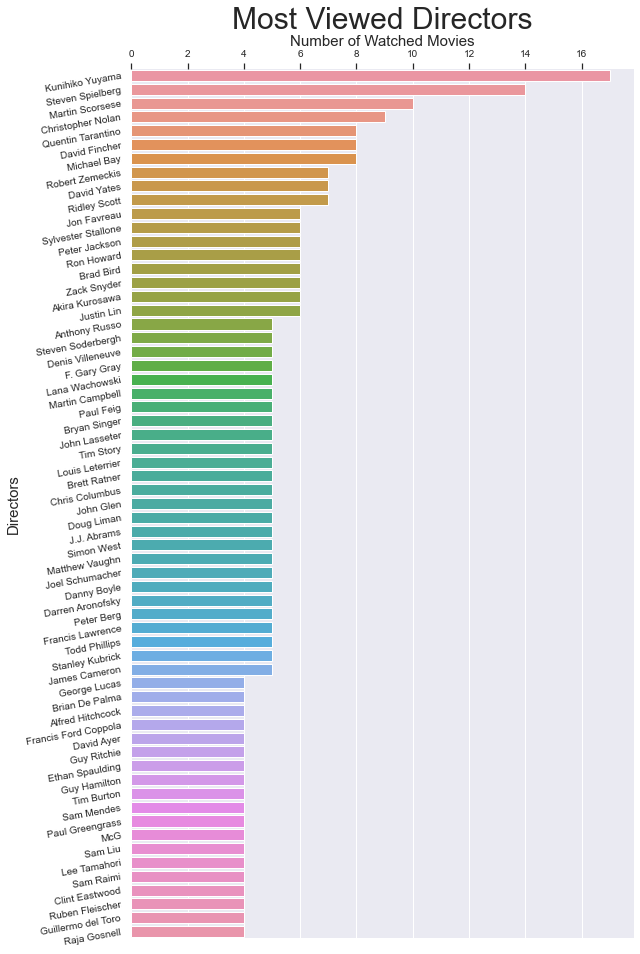

In [5]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 16))

sns.barplot(y=directors.index, x=directors, orient="h")
ax.set_title("Most Viewed Directors", fontsize=30)
sns.despine(left=True, bottom=True)

ax.set_xlabel("Number of Watched Movies", fontsize=15,)
ax.set_ylabel("Directors", fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), rotation=10)
ax.tick_params(labelsize=10)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

#### The third plot illustrates the most viewed genres of movies

In [6]:
# Get all the genres from the database
query = "select * from watched_movies_genres;"
genres_df = sqlio.read_sql_query(query, conn)

genres_df

/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


movie_id      genre
0     tt0373889     Action
1     tt0373889  Adventure
2     tt0373889     Family
3     tt0373889    Fantasy
4     tt0373889    Mystery
...         ...        ...
3552  tt8912936     Comedy
3553  tt8912936      Crime
3554  tt8912936     Family
3555  tt8912936    Fantasy
3556  tt8912936     Sci-Fi

[3557 rows x 2 columns]

In [7]:
# Count occurencies of genres
genres = genres_df['genre'].value_counts().sort_values(ascending=True)
# Change index name
genres = genres.rename_axis('Genres')
genres.index
# type(genres)

Index(['Film-Noir', 'Short', 'Western', 'Music', 'Musical', 'Documentary',
       'Sport', 'War', 'History', 'Horror', 'Romance', 'Biography', 'Mystery',
       'Animation', 'Family', 'Fantasy', 'Crime', 'Comedy', 'Sci-Fi',
       'Thriller', 'Drama', 'Adventure', 'Action'],
      dtype='object', name='Genres')

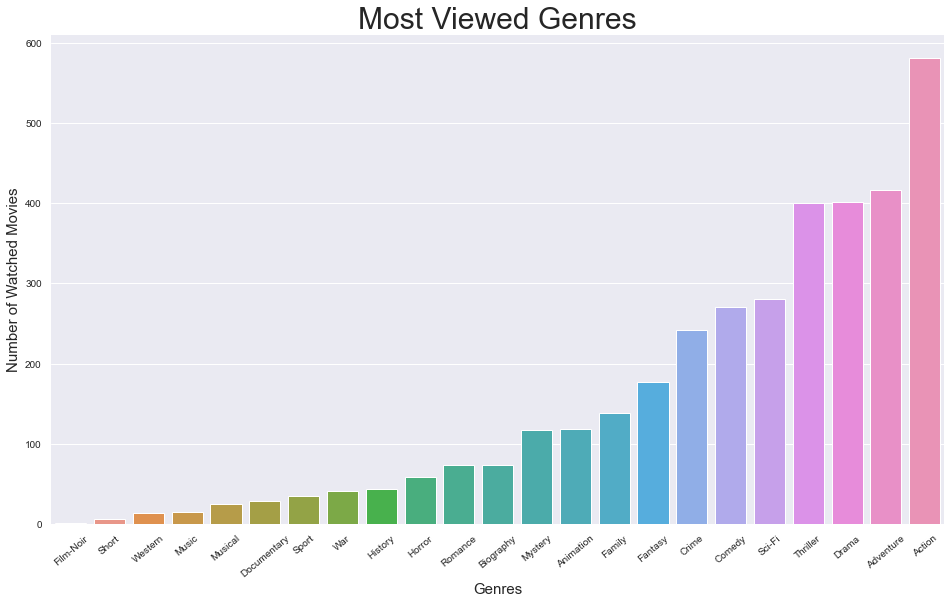

In [8]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 9))

sns.barplot(x=genres.index, y=genres, orient="v")
ax.set_title("Most Viewed Genres", fontsize=30)

sns.despine(left=True, bottom=True)

ax.set_ylabel("Number of Watched Movies", fontsize=15,)
ax.set_xlabel("Genres", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
ax.tick_params(labelsize=10)

#### The forth plot illustrates the distribution plot of duration of the watched movies

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/var/folders/k6/lpsy_w7d0k37645h6x_tkj9c0000gn/T/ipykernel_79089/1270571544.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=40)


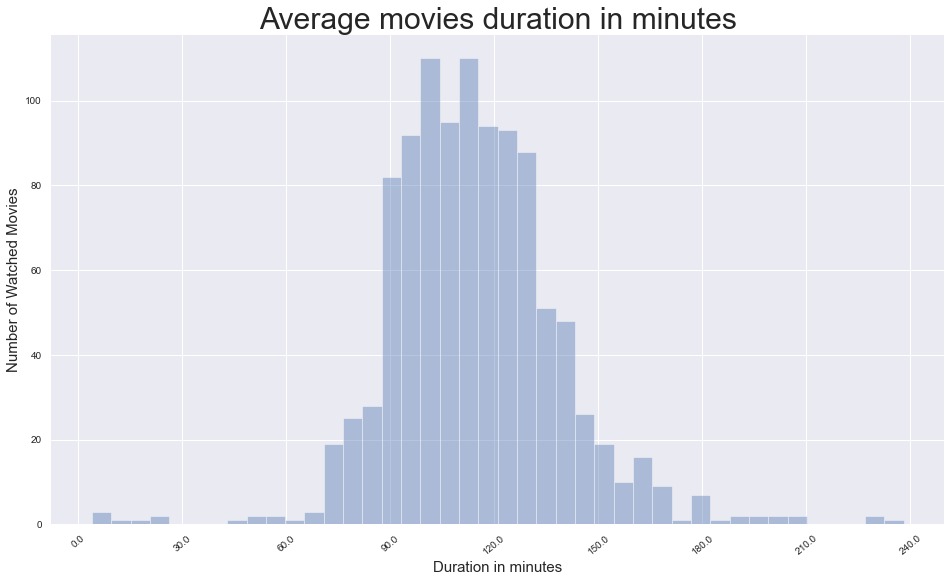

In [9]:
from matplotlib.ticker import MaxNLocator

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(16, 9))

# Distribution plot
sns.distplot(df['duration'], kde=False)
ax.set_title("Average movies duration in minutes", fontsize=30)

sns.despine(left=True, bottom=True)

ax.set_ylabel("Number of Watched Movies", fontsize=15,)
ax.set_xlabel("Duration in minutes", fontsize=15)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticklabels(ax.get_xticks(), rotation=40)
ax.tick_params(labelsize=10)

#### The final plot uses a bubble plot to show (again)the most viewed directors

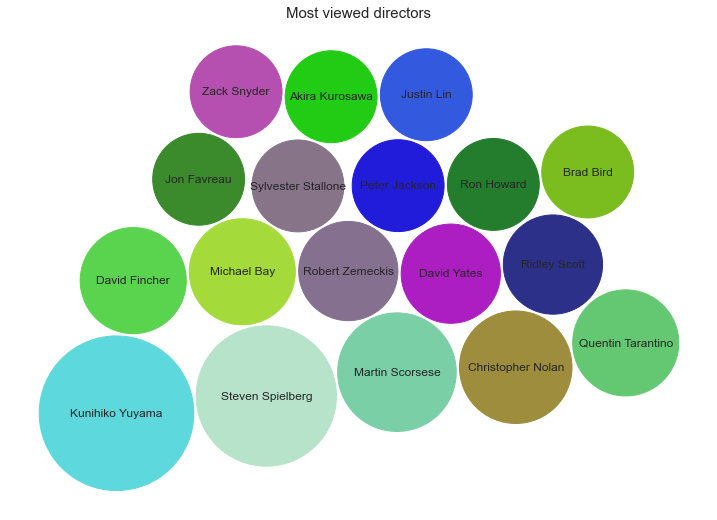

In [10]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


directors2 = df['director'].value_counts()
# Change index name
directors2 = directors2.rename_axis('Directors')
# Keep only occurences greater of 3
directors2 = directors2[directors2 > 5]

# Create a color list for the bubbles
colors = []
for i in range(100):
    colors.append('#%06X' % randint(0, 0xBBBBBB))

bubble_chart = BubbleChart(area=directors2[directors2.index], bubble_spacing=0.1)
bubble_chart.collapse()

# Plot
fig, ax = plt.subplots(figsize=(16, 9), subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, directors2.index.to_list(), colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Most viewed directors', fontsize=15)

plt.show()

In [11]:
directors3 = directors.head(20)
directors3

Directors
Kunihiko Yuyama       17
Steven Spielberg      14
Martin Scorsese       10
Christopher Nolan      9
Quentin Tarantino      8
David Fincher          8
Michael Bay            8
Robert Zemeckis        7
David Yates            7
Ridley Scott           7
Jon Favreau            6
Sylvester Stallone     6
Peter Jackson          6
Ron Howard             6
Brad Bird              6
Zack Snyder            6
Akira Kurosawa         6
Justin Lin             6
Anthony Russo          5
Steven Soderbergh      5
Name: director, dtype: int64

In [12]:
counts = directors3.to_numpy()
top_20_directors = directors3.index.to_numpy()

In [13]:
ratings = []
movie_id = []
for director in top_20_directors:
    movie_id_list = get_list_of_watched_movies(conn, director)
    ratings_df = retrieve_ratings_for_movies(movie_id_list)
    temp = ratings_df.loc[pd.to_numeric(ratings_df['rating']).idxmax()]
    ratings.append(temp['rating'])
    movie_id.append(temp['movie_id'])

/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 

In [14]:
director_and_movie = pd.DataFrame(
    {'director': top_20_directors,
     'counts': counts,
     'best_viewed_movie_id': movie_id
    })

In [15]:
director_and_movie['best_viewed_movie_title'] = [id_to_title(conn, id)[0] for id in movie_id]

/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 

In [16]:
director_and_movie['rating'] = ratings

In [17]:
director_and_movie

director  counts best_viewed_movie_id  \
0      Kunihiko Yuyama      17            tt0875609   
1     Steven Spielberg      14            tt0108052   
2      Martin Scorsese      10            tt0099685   
3    Christopher Nolan       9            tt0468569   
4    Quentin Tarantino       8            tt0110912   
5        David Fincher       8            tt0137523   
6          Michael Bay       8            tt4172430   
7      Robert Zemeckis       7            tt0109830   
8          David Yates       7            tt1201607   
9         Ridley Scott       7            tt0078748   
10         Jon Favreau       6            tt0371746   
11  Sylvester Stallone       6            tt0079817   
12       Peter Jackson       6            tt0167260   
13          Ron Howard       6            tt0268978   
14           Brad Bird       6            tt0382932   
15         Zack Snyder       6            tt0409459   
16      Akira Kurosawa       6            tt0047478   
17          Justin Lin       6            tt1596343   
18       Anthony Russo       5            tt4154756   
19   Steven Soderbergh       5            tt0240772   

                          best_viewed_movie_title rating  
0         Pokémon: Lucario and the Mystery of Mew    6.8  
1                                 Schindlers List    9.0  
2                                      Goodfellas    8.7  
3                                 The Dark Knight    9.0  
4                                    Pulp Fiction    8.9  
5                                      Fight Club    8.8  
6                                        13 Hours    7.3  
7                                    Forrest Gump    8.8  
8    Harry Potter and the Deathly Hallows: Part 2    8.1  
9                                           Alien    8.5  
10                                       Iron Man    7.9  
11                                       Rocky II    7.3  
12  The Lord of the Rings: The Return of the King    9.0  
13                               A Beautiful Mind    8.2  
14                                    Ratatouille    8.1  
15                                       Watchmen    7.6  
16                                  Seven Samurai    8.6  
17                                      Fast Five    7.3  
18                         Avengers: Infinity War    8.4  
19                                 Ocean's Eleven    7.7